In [238]:
import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt
from pytesseract import Output

In [239]:
config = r'--psm 12 --oem 3'

In [240]:
image = cv.imread("testImages/image3.png")
assert image is not None,"Image Not Found"

In [241]:
# Convert Image to RGB
image = cv.cvtColor(image,cv.COLOR_RGB2BGR)

(np.float64(-0.5), np.float64(1607.5), np.float64(803.5), np.float64(-0.5))

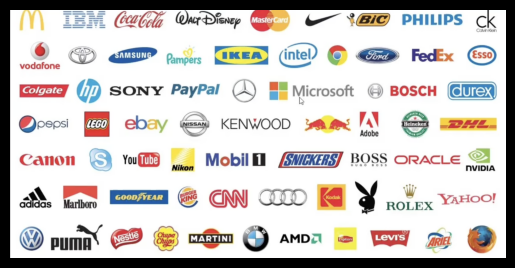

In [242]:
plt.imshow(image)
plt.axis("off")

In [243]:
height, widht, _ = image.shape
height,widht

(804, 1608)

In [244]:
COLOR = (0, 255, 0)

In [245]:
def find_individual_chars(image):
    boxes = pytesseract.image_to_boxes(image,config=config)
    for box in boxes.splitlines():
        box = box.split(" ")

        point1 = (int(box[1]), height - int(box[2]))
        point2 = (int(box[3]), height - int(box[4]))
        image = cv.rectangle(image, pt1=point1, pt2=point2, color=COLOR)
        print(box)
    return image

In [246]:
def find_words(image):
    data = pytesseract.image_to_data(image,config= config,output_type=Output.DICT)
    amount_of_boxes = len(data["text"])
    for i in range(amount_of_boxes):
        if float(data["conf"][i]) > 20:
            (x, y, w, h) = (
                data["left"][i],
                data["top"][i],
                data["width"][i],
                data["height"][i],
            )
            image = cv.rectangle(image, (x, y), (x + w, y + h), COLOR,thickness=2)
            image = cv.putText(image, data["text"][i], (x, y+h),cv.FONT_HERSHEY_DUPLEX,.7,COLOR,thickness=2)

    return image

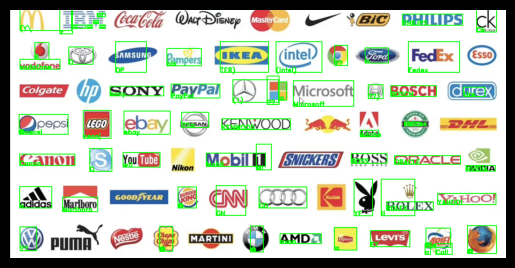

In [247]:
image = find_words(image)
plt.imshow(image)
plt.axis("off")
plt.show()